# Vocación Exportadora
Desarrollado por Ivan Gabriel Corredor Castillo
Febrero 2023

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import dtale
import matplotlib.ticker as ticker

In [75]:
expo_08_21 = pd.read_stata("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/BD_EXPO_2008_2021.dta")

In [76]:
expo_08_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490029 entries, 0 to 490028
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ANIO                    490029 non-null  float64
 1   DEPARTAMENTO_ORIGEN     490029 non-null  object 
 2   PAIS_DESTINO            490029 non-null  object 
 3   CODIGO_PARTIDA          490029 non-null  object 
 4   NOMBRE_PARTIDA          490029 non-null  object 
 5   DOLARES_FOB_CORRIENTES  490025 non-null  float64
 6   KGS_NETOS               490029 non-null  float64
dtypes: float64(3), object(4)
memory usage: 29.9+ MB


In [77]:
## número de elementos únicos de la partida arancelaria
len(expo_08_21["CODIGO_PARTIDA"].unique())

1280

In [78]:
# d = dtale.show(expo_08_21, ignore_duplicate = True)
# d

## Deflactar el valor exportado

In [79]:
### IPP exportados
# IPP_exp = [72.97, 82.41, 88.42, 103.16, 92.05, 94.26,
#             100, 104.15, 101.84, 107.35, 108.3, 117.04, 110.67, 161.79]
#IPC_usa = [210.228,215.949,219.179,225.672,229.601,233.049,234.812,236.525,241.432,246.524,251.233,256.974,260.474, 278.802]


In [80]:
# Ingreso deflactado ipc USA normalizado
def ipp_e(df):
    if (df["ANIO"]==2021):
        x =100
    elif (df["ANIO"]==2020):
        x = round((260.474/278.802)*100,2)
    elif (df["ANIO"]==2019):
        x = round((256.974/278.802)*100,2)
    elif (df["ANIO"]==2018):
        x = round((251.233/278.802)*100,2)
    elif (df["ANIO"]==2017):
        x = round((246.524/278.802)*100,2)
    elif (df["ANIO"]==2016):
        x = round((241.432/278.802)*100,2)
    elif (df["ANIO"]==2015):
        x = round((236.525/278.802)*100,2)
    elif (df["ANIO"]==2014):
        x = round((234.812/278.802)*100,2)
    elif (df["ANIO"]==2013):
        x = round((233.049/278.802)*100,2)
    elif (df["ANIO"]==2012):
        x = round((229.601/278.802)*100,2)
    elif (df["ANIO"]==2011):
        x = round((225.672/278.802)*100,2)
    elif (df["ANIO"]==2010):
        x = round((219.179/278.802)*100,2)
    elif (df["ANIO"]==2009):
        x = round((215.949/278.8029)*100,2)
    elif (df["ANIO"]==2008):
        x = round((210.228/278.802)*100,2)
    else:
        x = np.nan
    return(x)

In [81]:
### normalizar IPC DOLARES_FOB_CORRIENTES 
expo_08_21["ipp_e_norm"]= expo_08_21.apply(ipp_e,axis = 1)

In [82]:
# Construir deflactor
expo_08_21["deflactor"]= round((100/expo_08_21["ipp_e_norm"]),2)

In [83]:
## crear variable deflactada
expo_08_21["DOLARES_FOB_CONSTANTES"]= round((expo_08_21["DOLARES_FOB_CORRIENTES"]*expo_08_21["deflactor"]),2)

In [84]:
pg = "G:/Unidades compartidas/NE Exportaciones Venezuela/vocación_exportadora/datos/4_output"

In [85]:
# cambiar a separador de decimales
# import locale
# locale.setlocale(locale.LC_NUMERIC, 'German_Germany.1252')
#locale.setlocale(locale.LC_NUMERIC, 'en_US.UTF-8')
#locale.setlocale(locale.LC_ALL, '')
#pd.options.display.float_format = '{:.1f}'.format #lo que se muestra en pantalla, sin separador de miles, como para decimales

In [86]:
### Caracteristicas de las gráficas para la diagramación
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
# Define the desired font properties
font = FontProperties(family="Arial", style="normal", weight="normal", size=10)

# Set the font properties for all elements in the plot
plt.rcParams["font.family"] = font.get_family()
plt.rcParams["font.size"] = font.get_size()
plt.rcParams["font.weight"] = font.get_weight()

plt.rcParams["font.style"] = font.get_style()
####

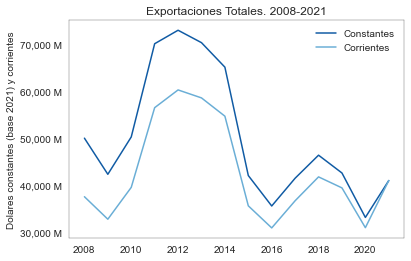

In [87]:
#Comparación de precios constantes y corrientes
#plt.style.use('seaborn') #otros estilos default, 'seaborn', 'ggplot' o 'bmh'.
# plt.rcParams['figure.facecolor'] = 'white'
# plt.rcParams['axes.grid'] = True
# plt.rcParams['grid.color'] = 'gray'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'gray'
plt.rcParams['axes.linewidth'] = 0.3
sns.set_style('white')
#sns.despine()
a = sns.lineplot(x="ANIO", y="DOLARES_FOB_CONSTANTES",  data =expo_08_21, ci = None,
                 label ="Constantes", estimator='sum')
b = sns.lineplot(x="ANIO", y="DOLARES_FOB_CORRIENTES", data =expo_08_21,ci = None, ax =a, 
                 label ="Corrientes", estimator='sum')
b.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f} M'.format(x/1000000)))
b.set_title("Exportaciones Totales. 2008-2021") 
# Add x-axis and y-axis labels
b.set_xlabel(None)
b.set_ylabel("Dolares constantes (base 2021) y corrientes") #b.set(xlabel= None, ylabel="Dolares constantes y corrientes")
plt.legend()
plt.legend(frameon=False)
#plt.close()
#plt.savefig("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/a1.png", bbox_inches="tight")
plt.show()


In [88]:
#exportaciones de bogotá al resto del mundo
bog_mundo = expo_08_21[expo_08_21["DEPARTAMENTO_ORIGEN"]=="Bogotá"] #& (expo_08_21["PAIS_DESTINO"]!="Venezuela")]

In [89]:
#exportaciones de colombia a venezuela con respecto a las exportaciónes de colombia al resto del mundo con venezuela
#colombia hacia_ven
col_mundo = expo_08_21.copy()#["PAIS_DESTINO"]!="Venezuela"]

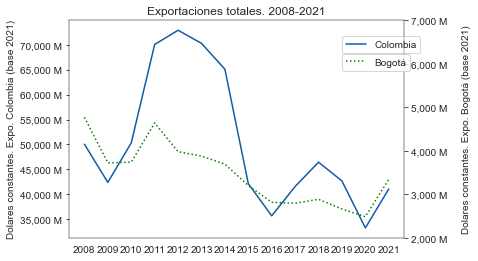

In [90]:
#gráfica
a11 = sns.lineplot(x="ANIO", y="DOLARES_FOB_CONSTANTES",  data =expo_08_21, ci = None,
                 label ="Colombia", estimator='sum') 
# Crear un eje secundario para la tercera variable
ax = plt.gca()
ax2 = ax.twinx()
# crear la tercera variable y asignarla en objeto para cambiar tipo de linea
b11 = sns.lineplot(x="ANIO", y="DOLARES_FOB_CONSTANTES",  data =bog_mundo, ci = None, 
             label ="Bogotá", estimator='sum',color='green', ax=ax2)  
##cambiar tipo de linea en eje secundario
for line in b11.lines:
    line.set_linestyle("dotted")
#hacer que la leyenda tenga el mismo estilo que la linea
legend = b11.get_legend()
legend_line = legend.legendHandles[0]
legend_line.set_linestyle("dotted") #"solid", "dotted", "dashed", y "dashdot
# Establecer la escala en el eje secundario
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f} M'.format(x/1000000)))
ax2.set_ylim(2000000000, 7000000000)
years = expo_08_21['ANIO'].unique()  # Assuming ANIO column contains the years
plt.xticks(years)
#mostrar leyenda en la posición deseada:
ax.legend(loc='upper left', bbox_to_anchor=(0.8, 0.95), ncol=1)  #leyenda eje principal
ax2.legend(loc='upper left', bbox_to_anchor=(0.8, 0.87), ncol=1) #leyenda eje secundario
#establecer titulo del eje y
ax2.set_ylabel("Dolares constantes. Expo. Bogotá (base 2021)",labelpad=15)
# asigna valores del eje y en el formato espcificado
a11.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f} M'.format(x/1000000))) #b.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
#_ en el código es una convención en Python para una variable ficticia. Se usa cuando solo te importa el primer argumento en una función y no necesitas usar el segundo argumento.
a11.set_title("Exportaciones totales. 2008-2021") #b.fig.suptitle
# Add x-axis and y-axis labels
a11.set_xlabel(None)
a11.set_ylabel("Dolares constantes. Expo. Colombia (base 2021)") 
#plt.savefig("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/a11.png", bbox_inches="tight")
plt.show()

In [91]:
#hacia_ven_bog[hacia_ven_bog["ANIO"]==2018]["DOLARES_FOB_CONSTANTES"].sum()

### A. Exportaciones colombianas y bogotanas a venezuela
participación de venezuela dentro del total exportado

In [92]:
##filtros
hacia_ven = expo_08_21[expo_08_21["PAIS_DESTINO"]=="Venezuela"] #de colombia hacia venezuela
hacia_ven_bog = hacia_ven[hacia_ven["DEPARTAMENTO_ORIGEN"]=="Bogotá"] # de bogotá hacia venezuela

In [93]:
##agrupación expor hacía venezuela
c_1 = hacia_ven_bog.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})

In [94]:
# exportaciones totales de bogotá a venezuela por año
c_1

,DOLARES_FOB_CONSTANTES
ANIO,
2008.0,1.766601e+09
2009.0,1.059753e+09
2010.0,4.386334e+08
2011.0,4.538242e+08
2012.0,5.376305e+08
2013.0,3.465650e+08
2014.0,3.175035e+08
2015.0,2.605178e+08
2016.0,1.047731e+08


In [95]:
##agrupación expor totales
c_2 = hacia_ven.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})

In [96]:
#agrupación participación de venezuela en el total exportado
c = round((c_1/c_2)*100,1)
c = c.reset_index()
c

,ANIO,DOLARES_FOB_CONSTANTES
0,2008.0,21.8
1,2009.0,20.3
2,2010.0,24.5
3,2011.0,21.0
4,2012.0,17.4
5,2013.0,12.8
6,2014.0,13.4
7,2015.0,20.8
8,2016.0,14.8
9,2017.0,15.8


In [97]:
c_1.index

Float64Index([2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0,
              2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0],
             dtype='float64', name='ANIO')

In [98]:
#variación de bogotá a venezuela 2008 – 2010: 
print("var 2008 – 2010:", round((c_1.iloc[2,0] - c_1.iloc[0,0]) / c_1.iloc[0,0]*100,1))
print("var 2010 – 2012:", round((c_1.iloc[4,0] - c_1.iloc[2,0]) / c_1.iloc[2,0]*100,1))
print("var 2012 – 2021:", round((c_1.iloc[13,0] - c_1.iloc[4,0]) / c_1.iloc[4,0]*100,1))
print("US prom 2011 – 2012:", (453824226.3 + 537630495.4)/2)

var 2008 – 2010: -75.2
var 2010 – 2012: 22.6
var 2012 – 2021: -84.7
US prom 2011 – 2012: 495727360.85


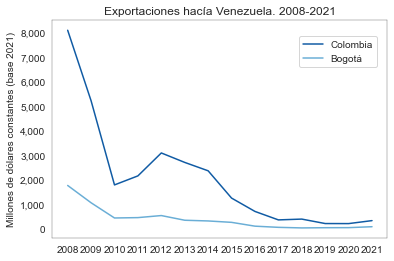

In [99]:
#colores:
palette = sns.color_palette("Blues", n_colors=5)
specific_colors = [palette[i] for i in [4,2]]
sns.set_palette(palette=specific_colors)
#gráfica
sns.lineplot(x="ANIO", y="DOLARES_FOB_CONSTANTES", data =hacia_ven, 
             ci = None, label ="Colombia", estimator='sum')
#se guarda como objeto para espcificar los valores del eje y, el titulo del gráfico y del eje. Esto se puede hacer en cualquiera de los gráficos sobrepuestos. Con uno es sufiente. 
b=sns.lineplot(x="ANIO", y="DOLARES_FOB_CONSTANTES",  
               data =hacia_ven_bog, ci = None, label ="Bogotá", estimator='sum')
#mostrar leyenda en la posición deseada:
b.legend(loc='upper left', bbox_to_anchor=(0.72, 0.95), ncol=1) 
# asigna valores del eje y en el formato espcificado
years = hacia_ven['ANIO'].unique()  # Assuming ANIO column contains the years
plt.xticks(years)
#import matplotlib.ticker as ticker
b.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x/1000000)))#b.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
#_ en el código es una convención en Python para una variable ficticia. Se usa cuando solo te importa el primer argumento en una función y no necesitas usar el segundo argumento.
b.set_title("Exportaciones hacía Venezuela. 2008-2021") #b.fig.suptitle
# Add x-axis and y-axis labels
b.set_xlabel(None)
b.set_ylabel("Millones de dólares constantes (base 2021)") 

plt.savefig(pg + str("/a2.pdf"), bbox_inches="tight") #png

plt.show()

In [100]:
# Proporción de exportaciones de bogotá a venezuela con respecto a las exportaciones bogotanas al resto del mundo.
b_v = hacia_ven_bog.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) # bogotá a vene.
b_m = bog_mundo.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) #bogotá al mundo con vene.
vm = round((b_v/b_m)*100,1)
vm = vm.reset_index()
#exportaciones de colombia a venezuela con respecto a las exportaciónes de colombia al resto del mundo sin venezuela
c_v = hacia_ven.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) # bogotá a vene.
c_m = col_mundo.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) #bogotá al mundo con vene.
cm = round((c_v/c_m)*100,1)
cm = cm.reset_index()

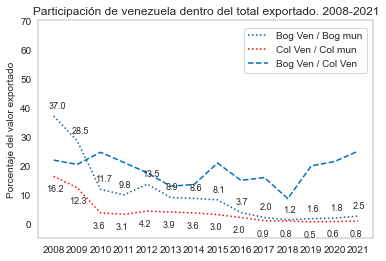

In [101]:
#grafíca
e = sns.lineplot(x="ANIO", y="DOLARES_FOB_CONSTANTES",  
               data =vm, ci = None, label ="Bog Ven / Bog mun", estimator='sum')
f = sns.lineplot(x="ANIO", y="DOLARES_FOB_CONSTANTES",  
               data =cm, ci = None, label ="Col Ven / Col mun", estimator='sum', color ='red')
d = sns.lineplot(x="ANIO", y="DOLARES_FOB_CONSTANTES",  data =c, ci = None, 
             label ="Bog Ven / Col Ven", estimator=None, color='#0071bc')
#put to labels on line e
xe=e.get_lines()[0].get_data()[0] #get_lines()[] 0 para bogotá al mundo, 1 para bogotá; get_data()[] 0 eje x, 1 eje y
ye=e.get_lines()[0].get_data()[1]
for i,j in zip(xe,ye):
    e.annotate(j, xy=(i,j), textcoords="offset points", 
             xytext=(-5, 8), ha='left', fontsize=9)
#put to labels on line f
xf=f.get_lines()[1].get_data()[0] #get_lines()[] 0 para línea 1, 1 para línea 2; get_data()[] 0 eje x, 1 eje y
yf=f.get_lines()[1].get_data()[1]
for i,j in zip(xf,yf):
    f.annotate(j, xy=(i,j), textcoords="offset points", 
             xytext=(-8, -15), ha='left', fontsize=9)
##cambiar linea del terce objeto
d.lines[0].set_linestyle("dotted")
d.lines[1].set_linestyle("dotted")
d.lines[2].set_linestyle("dashed") # "solid", "dotted", "dashed", y "dashdot"
#Establecer la escala en el eje secundario
e.set_ylim(-5, 70)
# colcoar en el eje x todos los años
years = vm['ANIO'].unique()
plt.xticks(years)
#e.set_xticks(range(2008, 2022, 1)) #ajusta la periodicidad delintervalo del eje x , y
e.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
e.set_title("Participación de venezuela dentro del total exportado. 2008-2021") #b.fig.suptitle
# Add x-axis and y-axis labels
e.set_xlabel(None)
e.set_ylabel("Porcentaje del valor exportado")
#mostrar leyenda en la posición deseada:
d.legend(loc='upper left', bbox_to_anchor=(0.6, 0.99), ncol=1)  #leyenda eje principal
# Add x-axis and y-axis labels
d.set_xlabel(None)
#plt.rcParams["font.family"] = "sans"
#guardar

plt.savefig(pg + str("/a11.pdf"), bbox_inches="tight") #png
plt.show()

In [102]:
#La participación de  Bogotá en las exportaciones nacionales hacia Venezuela 2008 – 2021: 
print("var 2008 – 2021:", round((c.iloc[13,1] - c.iloc[0,1]) / c.iloc[0,1]*100,1))

var 2008 – 2021: 14.2


### B. No. de productos totales exportados y con destino a Venezuela

In [103]:
hacia_ven_bog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6345 entries, 19159 to 473579
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ANIO                    6345 non-null   float64
 1   DEPARTAMENTO_ORIGEN     6345 non-null   object 
 2   PAIS_DESTINO            6345 non-null   object 
 3   CODIGO_PARTIDA          6345 non-null   object 
 4   NOMBRE_PARTIDA          6345 non-null   object 
 5   DOLARES_FOB_CORRIENTES  6345 non-null   float64
 6   KGS_NETOS               6345 non-null   float64
 7   ipp_e_norm              6345 non-null   float64
 8   deflactor               6345 non-null   float64
 9   DOLARES_FOB_CONSTANTES  6345 non-null   float64
dtypes: float64(6), object(4)
memory usage: 545.3+ KB


In [104]:
# convertir variable a entera solo para esta gráfica (b1)
bog_mundo["CODIGO_PARTIDA"], hacia_ven_bog["CODIGO_PARTIDA"] = bog_mundo["CODIGO_PARTIDA"].astype("int"), hacia_ven_bog["CODIGO_PARTIDA"].astype("int") 

<ipython-input-104-eaa40b33da40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bog_mundo["CODIGO_PARTIDA"], hacia_ven_bog["CODIGO_PARTIDA"] = bog_mundo["CODIGO_PARTIDA"].astype("int"), hacia_ven_bog["CODIGO_PARTIDA"].astype("int")


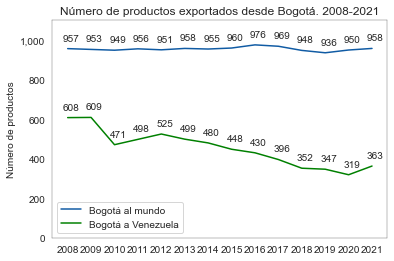

In [105]:
#Bogotá al resto del mundo con venezuela
a=sns.lineplot(x="ANIO", y="CODIGO_PARTIDA", data=bog_mundo, ci=None, #errorbar=None, 
             label="Bogotá al mundo", estimator= lambda x: len(set(x))) #para valores únicos string; para valores únicos numericos unique()
#se guarda como objeto para espcificar los valores del eje y, el titulo del gráfico y del eje. Esto se puede hacer en cualquiera de los gráficos sobrepuestos. Con uno es sufiente. 
b=sns.lineplot(x="ANIO", y="CODIGO_PARTIDA",  
               data =hacia_ven_bog,  label ="Bogotá a Venezuela", ci=None,#errorbar=None,
               estimator=lambda x: len(set(x)), color='green')
#etiquetas gráfica a
xa=a.get_lines()[0].get_data()[0] #get_lines()[] 0 para bogotá al mundo 1 para bogotá a venezuela; get_data()[] 0 eje x, 1 eje y
ya=a.get_lines()[0].get_data()[1].astype(int)
for i,j in zip(xa,ya):
    b.annotate(j, xy=(i,j), textcoords="offset points", 
             xytext=(-5, 8), ha='left', fontsize=10)
#etiquetas gráfica b
xb=b.get_lines()[1].get_data()[0]
yb=b.get_lines()[1].get_data()[1].astype(int)
for i,j in zip(xb,yb):
    b.annotate(j, xy=(i,j), textcoords="offset points", 
             xytext=(-5, 8), ha='left', fontsize=10)
# colcoar en el eje x todos los años
years = bog_mundo['ANIO'].unique()
plt.xticks(years)
# asigna valores del eje y en el formato espcificado
import matplotlib.ticker as ticker
b.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}')) 
b.set_ylim(0, 1100)
b.set_title("Número de productos exportados desde Bogotá. 2008-2021") #b.fig.suptitle
# Add x-axis and y-axis labels
b.set_xlabel(None)
b.set_ylabel("Número de productos") #b.set(xlabel= None, ylabel="Dolares constantes y corrientes")
plt.legend(loc='lower left')
plt.savefig(pg + str("/b1.pdf"), bbox_inches="tight")
plt.show()

### Participación de los tres principales destinos de exportación, venezuela y otros, periodo 2008 - 2021

In [106]:
expo_08_21.columns

Index(['ANIO', 'DEPARTAMENTO_ORIGEN', 'PAIS_DESTINO', 'CODIGO_PARTIDA',
       'NOMBRE_PARTIDA', 'DOLARES_FOB_CORRIENTES', 'KGS_NETOS', 'ipp_e_norm',
       'deflactor', 'DOLARES_FOB_CONSTANTES'],
      dtype='object')

In [107]:
bog_total = expo_08_21[expo_08_21["DEPARTAMENTO_ORIGEN"]=="Bogotá"]
bt = bog_total.groupby(["ANIO", "PAIS_DESTINO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})
bt = bt.reset_index()
bt = bt.sort_values(by=['ANIO', 'DOLARES_FOB_CONSTANTES'], ascending=[True, False])
bt = bt.reset_index(drop =True)
#obtener los primeros tres valores por año
first_three = bt.groupby("ANIO").head(3) 
first_three = first_three.reset_index(drop=True)

In [108]:
#el código arriba obtiene los 3 primeros países por año, luego de esto filtro en el objeto anterior para obtner todos los paises en el ranking, ya que estos cambian año a año 
btt = bt[bt["PAIS_DESTINO"].isin(["Venezuela", "Estados Unidos", "Ecuador", "Perú", "México"])]

In [109]:
#total de las exportaciones por año"PART_DOL_CONS"
bta= bog_total.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) #bogotá al mundo
bta = bta.reset_index()
btt_m = btt.merge(bta, on = "ANIO")
btt_m["PART_DOL_CONS"] = round((btt_m["DOLARES_FOB_CONSTANTES_x"]/btt_m["DOLARES_FOB_CONSTANTES_y"])*100,1)
btt_m

,ANIO,PAIS_DESTINO,DOLARES_FOB_CONSTANTES_x,DOLARES_FOB_CONSTANTES_y,PART_DOL_CONS
0,2008.0,Venezuela,1.766601e+09,4.769151e+09,37.0
1,2008.0,Estados Unidos,7.971594e+08,4.769151e+09,16.7
2,2008.0,Ecuador,5.606573e+08,4.769151e+09,11.8
3,2008.0,Perú,1.869154e+08,4.769151e+09,3.9
4,2008.0,México,1.599333e+08,4.769151e+09,3.4
...,...,...,...,...,...
65,2021.0,Estados Unidos,1.301179e+09,3.344862e+09,38.9
66,2021.0,Ecuador,3.760955e+08,3.344862e+09,11.2
67,2021.0,México,2.579419e+08,3.344862e+09,7.7
68,2021.0,Perú,1.919192e+08,3.344862e+09,5.7


In [110]:
#
print(797159404.8/4769150708.9)

0.16714913271924345


In [111]:
btt

,ANIO,PAIS_DESTINO,DOLARES_FOB_CONSTANTES
0,2008.0,Venezuela,1.766601e+09
1,2008.0,Estados Unidos,7.971594e+08
2,2008.0,Ecuador,5.606573e+08
3,2008.0,Perú,1.869154e+08
4,2008.0,México,1.599333e+08
...,...,...,...
2168,2021.0,Estados Unidos,1.301179e+09
2169,2021.0,Ecuador,3.760955e+08
2170,2021.0,México,2.579419e+08
2171,2021.0,Perú,1.919192e+08


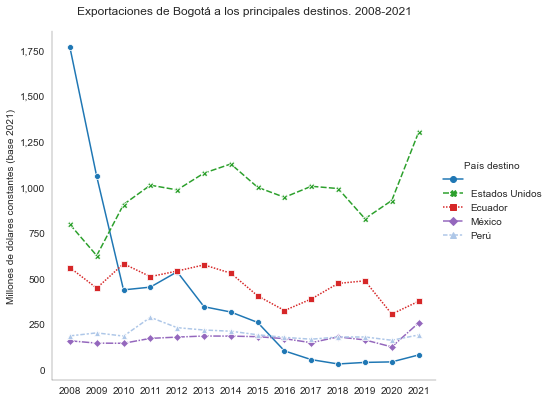

In [112]:
#c1b
## gráfica valores
marker_styles = {"Venezuela": "o", "Perú": "^", "Ecuador": "s", 
                 "México": "D", "Estados Unidos": "X",}
colors = {"Venezuela": '#1f77b4', "Perú": '#aec7e8', "Ecuador": '#d62728', 
                 "México":'#9467bd', "Estados Unidos": '#2ca02c'}
order= ["Venezuela","Estados Unidos", "Ecuador", "México", "Perú"]
palette = sns.color_palette("tab20", n_colors=20)
specific_colors = [palette[i] for i in [0,1,4,6,8]]
sns.set_palette(palette=specific_colors)
g = sns.relplot(x="ANIO", y="DOLARES_FOB_CONSTANTES_x", data=btt_m, kind="line", palette=colors,
                ci=None, hue= "PAIS_DESTINO", style="PAIS_DESTINO", markers=marker_styles, dashes=True,
               height=5.5, aspect=1.1, hue_order=order)
g.fig.suptitle("Exportaciones de Bogotá a los principales destinos. 2008-2021",x=0.44, y = 1.01,
              horizontalalignment="center")
# colcoar en el eje x todos los años
years = btt_m['ANIO'].unique()
plt.xticks(years)
#establecer escala del eje y en millones
def y_format(x, _):
    return '{:,.0f}'.format(x/1000000)
g.ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_format))
#j.ax.set_ylim(bottom=0, top=1000000000)
g.set(xlabel=None, 
       ylabel="Millones de dólares constantes (base 2021)")
g._legend.texts[0].set_text("")
g._legend.set_title("País destino")
plt.savefig(pg + str("/c1b.pdf"), bbox_inches="tight") #png
plt.show()

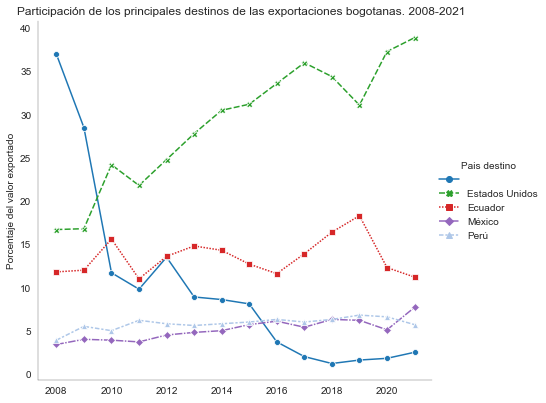

In [113]:
## gráfica participación
marker_styles = {"Venezuela": "o", "Perú": "^", "Ecuador": "s", 
                 "México": "D", "Estados Unidos": "X",}
colors = {"Venezuela": '#1f77b4', "Perú": '#aec7e8', "Ecuador": '#d62728', 
                 "México":'#9467bd', "Estados Unidos": '#2ca02c'}
order= ["Venezuela","Estados Unidos", "Ecuador", "México", "Perú"]
palette = sns.color_palette("tab20", n_colors=20)
specific_colors = [palette[i] for i in [0,1,4,6,8]]
sns.set_palette(palette=specific_colors)
g = sns.relplot(x="ANIO", y="PART_DOL_CONS", data=btt_m, kind="line", palette=colors,
                ci=None, hue= "PAIS_DESTINO", style="PAIS_DESTINO", markers=marker_styles, dashes=True,
               height=5.5, aspect=1.1, hue_order=order)
g.fig.suptitle("Participación de los principales destinos de las exportaciones bogotanas. 2008-2021",x=0.44, y = 1.01,
              horizontalalignment="center")
g.set(xlabel=None, 
       ylabel="Porcentaje del valor exportado")
g._legend.texts[0].set_text("")
g._legend.set_title("Pais destino")
#g.add_legend(title="Pais destino")
#plt.savefig("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/c1.png", bbox_inches="tight")
plt.show()

### Nivel Tecnológico y Complejidad

Participación porcentual de las exportaciones por nivel tecnológico hacia Venezuela y por nivel de complejidad 2008-2021.

1. Participación de las exportaciones de bogotá a venezuela con respecto a las de bogotá al mundo por año y nivel tecnológico agregado

In [114]:
## cargue y pegue de las bases de nivel tecnológico y complejidad
niv_tec = pd.read_stata("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/partida_niv_tec.dta")
comple = pd.read_stata("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/pc_p3_df.dta")

In [115]:
# pegue base exportaciones original con nivel tecnológicob
expo_08_21_nt = expo_08_21.merge(niv_tec, how = "left", left_on ="CODIGO_PARTIDA", right_on = "partida" )

In [116]:
# pegue base exportaciones original con complejidad
exp_nt_com = expo_08_21_nt.merge(comple, how = "left", left_on ="CODIGO_PARTIDA", right_on = "partida" )

In [117]:
## expotaciones de bogotá a venezuela
col_ven = exp_nt_com[exp_nt_com["PAIS_DESTINO"]=="Venezuela"] #de colombia hacia venezuela
bog_ven = col_ven[col_ven["DEPARTAMENTO_ORIGEN"]=="Bogotá"] #

In [118]:
bog_ven = bog_ven.reset_index(drop=True)

In [119]:
#exportaciones de bogotá al resto del mundo con venezuela
bog_mundo_1 = exp_nt_com[exp_nt_com["DEPARTAMENTO_ORIGEN"]=="Bogotá"] #& (expo_08_21["PAIS_DESTINO"]!="Venezuela")]

In [120]:
bog_mundo_1 = bog_mundo_1.reset_index(drop=True)

In [121]:
# Proporción de exportaciones de bogotá a venezuela con respecto a las exportaciones bogotanas al resto del mundo.
b_v1 = bog_ven.groupby(["ANIO","nivel_tecno_1"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) # bogotá a vene.
b_m1 = bog_mundo_1.groupby(["ANIO", "nivel_tecno_1"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) #bogotá al mundo con vene.
vm1 = round((b_v1/b_m1)*100,1)
vm1 = vm1.reset_index()

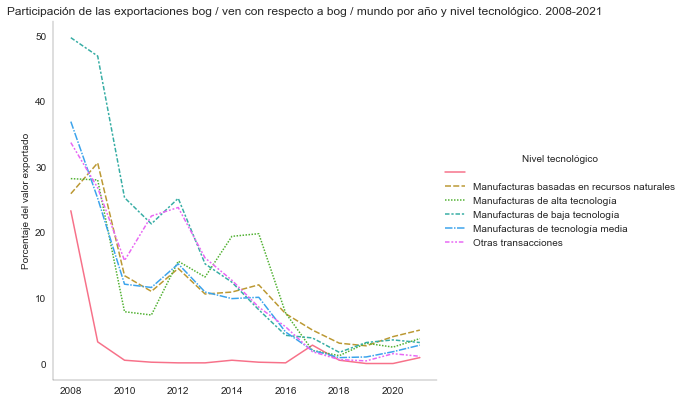

In [122]:
## participación expo bog/ven con respecto a bog / mundo por año y nivel tecnológico agregado

h = sns.relplot(x="ANIO", y='DOLARES_FOB_CONSTANTES', data=vm1, kind="line", 
                ci=None, hue= "nivel_tecno_1", style="nivel_tecno_1", markers=False, dashes=True,
               height=5.5, aspect=1.1) #leyend="brief", "full"
h.fig.suptitle("Participación de las exportaciones bog / ven con respecto a bog / mundo por año y nivel tecnológico. 2008-2021",x=0.44, y = 1.01,
              horizontalalignment="center")
h.set(xlabel=None, 
       ylabel="Porcentaje del valor exportado")
h._legend.texts[0].set_text("")
h._legend.set_title("Nivel tecnológico")
#g.add_legend(title="Pais destino")
#plt.savefig("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/h1.png", bbox_inches="tight")
plt.show()

### barras apiladas

In [123]:
pd.options.display.float_format = '{:.1f}'.format

In [124]:
# Proporción de exportaciones de bogotá a venezuela con respecto a las exportaciones bogotanas al resto del mundo.
b_v1 = bog_ven.groupby(["ANIO","nivel_tecno_1"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) # bogotá a vene.
b_vn = bog_ven.groupby(["ANIO"]).apply(lambda x: np.sum(x[["DOLARES_FOB_CONSTANTES"]][x["nivel_tecno_1"].notnull()])) #bogotá al mundo con vene.
vn = round((b_v1/b_vn)*100,1)
vn = vn.reset_index()

In [125]:
vn["ANIO"] = vn["ANIO"].astype("int")

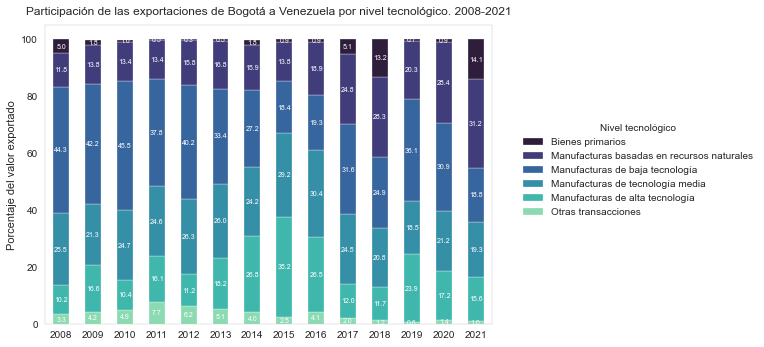

In [126]:
# create a pivot table to aggregate the data by year and technology level
plt.style.use('seaborn')
#colors = ['#78C2AD', '#F8A055', '#F7C59F', '#F7A278', '#F6755E', '#F65843']
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'gray'
plt.rcParams['axes.linewidth'] = 0.2
# set the default color palette for seaborn
sns.set_palette("mako_r") # "Blues" ""cubehelix", "Paired", RdBu,"rocket","Set2", deep, muted, pastel, bright, dark, colorblind,"mako" "magma"
##lista de columnas para ordenar
desired_order = ['Otras transacciones',  'Manufacturas de alta tecnología',
                 'Manufacturas de tecnología media','Manufacturas de baja tecnología',
                'Manufacturas basadas en recursos naturales','Bienes primarios']
pivot_df = pd.pivot_table(data=vn, values='DOLARES_FOB_CONSTANTES', index='ANIO', columns='nivel_tecno_1')
#reordenar
pivot_df = pivot_df.loc[:,desired_order] 
# create a stacked column chart using seaborn
ax = pivot_df.plot(kind='bar', stacked=True)
# add labels to each bar
# add labels to each bar
for i, patch in enumerate(ax.containers):
    for j, bar in enumerate(patch.patches):
        value = f"{pivot_df.iloc[j,i]:.1f}"
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + bar.get_height() / 2,
            value,
            ha='center',
            va='center',
            fontsize=7,
            color='white'
        )
#add title
plt.title("Participación de las exportaciones de Bogotá a Venezuela por nivel tecnológico. 2008-2021", pad = 10) 
# add labels and legend
plt.xlabel(None)
plt.ylabel("Porcentaje del valor exportado")
# Change the order of the handles and labels
handles, labels = ax.get_legend_handles_labels()
labels = [labels[i] for i in [5, 4, 3, 2, 1, 0]]
handles = [handles[i] for i in [5, 4, 3, 2, 1, 0]]
#change the names
plt.legend(handles=handles, labels=labels, title='Nivel tecnológico', bbox_to_anchor=(1.05, 0.7))
plt.xticks(rotation=0)
plt.savefig(pg + str("/h11b.pdf"), bbox_inches="tight") #png
# show the chart
plt.show()

In [127]:
# Proporción de exportaciones de bogotá a venezuela con respecto a las exportaciones bogotanas al resto del mundo.
b_m1 = bog_mundo_1.groupby(["ANIO","nivel_tecno_1"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) 
b_ma= bog_mundo_1.groupby(["ANIO"]).apply(lambda x: np.sum(x[["DOLARES_FOB_CONSTANTES"]][x["nivel_tecno_1"].notnull()])) # sumar el valor de las exportaciones donde el nivel tecnológico no es nulo 
bm1a = round((b_m1/b_ma)*100,1)
bm1a = bm1a.reset_index()

In [128]:
bm1a["ANIO"] = bm1a["ANIO"].astype("int")

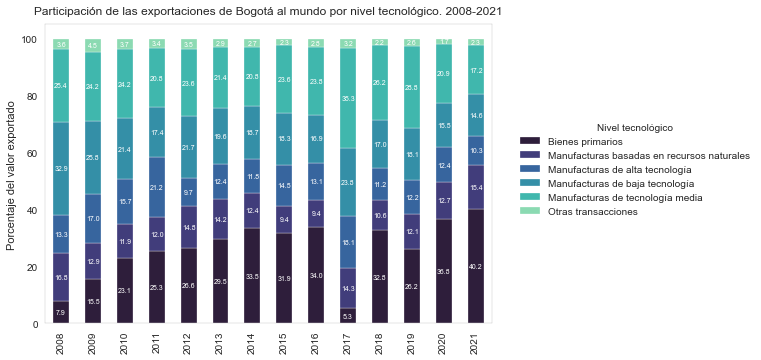

In [129]:
# create a pivot table to aggregate the data by year and technology level
#plt.style.use('seaborn')
# set the default color palette for seaborn
sns.set_palette("mako") # "Blues" ""cubehelix", "Paired", RdBu,"rocket","Set2", deep, muted, pastel, bright, dark, colorblind,"mako" "magma"
pivot_df1 = pd.pivot_table(data=bm1a, values='DOLARES_FOB_CONSTANTES', index='ANIO', columns='nivel_tecno_1')
# create a stacked column chart using seaborn
ax = pivot_df1.plot(kind='bar', stacked=True)
# add labels to each bar
# add labels to each bar
for i, patch in enumerate(ax.containers):
    for j, bar in enumerate(patch.patches):
        value = f"{pivot_df1.iloc[j,i]:.1f}"
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + bar.get_height() / 2,
            value,
            ha='center',
            va='center',
            fontsize=7,
            color='white'
        )
#add labels to each bar
plt.title("Participación de las exportaciones de Bogotá al mundo por nivel tecnológico. 2008-2021", pad = 10) 
# add labels and legend
plt.xlabel(None)
plt.ylabel("Porcentaje del valor exportado")
plt.legend(title='Nivel tecnológico', bbox_to_anchor=(1.6, 0.7))
#plt.savefig("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/h12.png", bbox_inches="tight")
# show the chart
plt.show()

### Complejidad

In [130]:
## participación expo bog/ven con respecto a bog / mundo por año y nivel de complejidad
b_v2 = bog_ven.groupby(["ANIO","pci_p3"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) # bogotá a vene.
b_m2 = bog_ven.groupby(["ANIO"]).apply(lambda x: np.sum(x[["DOLARES_FOB_CONSTANTES"]][x["pci_p3"].notnull()]))#bogotá al mundo con vene.
vm2 = round((b_v2/b_m2)*100,1)
vm2 = vm2.reset_index()

In [131]:
vm2["ANIO"] = vm2["ANIO"].astype("int")

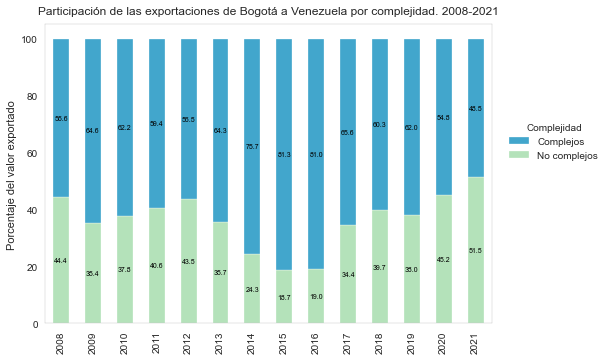

In [132]:
# create a pivot table to aggregate the data by year and technology level
# set the default color palette for seaborn
sns.set_palette("GnBu", n_colors = 2) # "Blues" ""cubehelix", "Paired", RdBu,"rocket","Set2", deep, muted, pastel, bright, dark, colorblind,"mako" "magma"
pivot_df2 = pd.pivot_table(data=vm2, values='DOLARES_FOB_CONSTANTES', index='ANIO', columns='pci_p3')
# create a stacked column chart using seaborn
ax1 = pivot_df2.plot(kind='bar', stacked=True)
# add labels to each bar
for i, patch in enumerate(ax1.containers):
    for j, bar in enumerate(patch.patches):
        value = f"{pivot_df2.iloc[j,i]:.1f}"
        ax1.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + bar.get_height() / 2,
            value,
            ha='center',
            va='center',
            fontsize=7,
            color='black'
        )
#add labels to each bar
plt.title("Participación de las exportaciones de Bogotá a Venezuela por complejidad. 2008-2021", pad = 10) 
# add labels and legend
plt.xlabel(None)
plt.ylabel("Porcentaje del valor exportado")
# Change the order of the handles and labels
handles, labels = ax1.get_legend_handles_labels()
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]
#change the names
labels = ["Complejos", "No complejos"]
plt.legend(handles=handles, labels=labels, title='Complejidad', bbox_to_anchor=(1.02, 0.7))
plt.savefig(pg + str("/i11.pdf"), bbox_inches="tight") #png
# show the chart
plt.show()

In [133]:
# participación de las exportaciones de Bogotá al mundo por complejidad
b_m2 = bog_mundo_1.groupby(["ANIO","pci_p3"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) 
b_ma2= bog_mundo_1.groupby(["ANIO"]).apply(lambda x: np.sum(x[["DOLARES_FOB_CONSTANTES"]][x["pci_p3"].notnull()])) # sumar el valor de las exportaciones donde el nivel tecnológico no es nulo 
bm2a = round((b_m2/b_ma2)*100,1)
bm2a = bm2a.reset_index()

In [134]:
bm2a["ANIO"] = bm2a["ANIO"].astype("int")

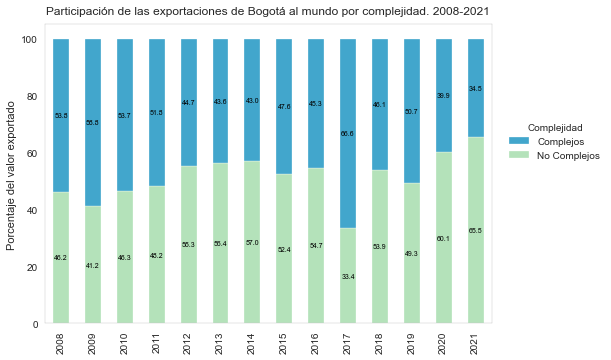

In [135]:
# create a pivot table to aggregate the data by year and technology level
# set the default color palette for seaborn
sns.set_palette("GnBu", n_colors = 2) # "Blues" ""cubehelix", "Paired", RdBu,"rocket","Set2", deep, muted, pastel, bright, dark, colorblind,"mako" "magma"
pivot_df2 = pd.pivot_table(data=bm2a, values='DOLARES_FOB_CONSTANTES', index='ANIO', columns='pci_p3')
# create a stacked column chart using seaborn
ax1 = pivot_df2.plot(kind='bar', stacked=True)
# add labels to each bar
for i, patch in enumerate(ax1.containers):
    for j, bar in enumerate(patch.patches):
        value = f"{pivot_df2.iloc[j,i]:.1f}"
        ax1.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + bar.get_height() / 2,
            value,
            ha='center',
            va='center',
            fontsize=7,
            color='black'
        )
#add labels to each bar
plt.title("Participación de las exportaciones de Bogotá al mundo por complejidad. 2008-2021", pad = 10) 
# add labels and legend
plt.xlabel(None)
plt.ylabel("Porcentaje del valor exportado")
# Change the order of the handles and labels
handles, labels = ax1.get_legend_handles_labels()
handles = [handles[1], handles[0]]
labels = [labels[1], labels[0]]
#change the names
labels = ["Complejos", "No Complejos"]
plt.legend(handles=handles, labels=labels, title='Complejidad', bbox_to_anchor=(1.02, 0.7), frameon=False)

#plt.savefig("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/i12.png", bbox_inches="tight")
# show the chart
plt.show()

In [136]:
# Proporción de exportaciones de bogotá a venezuela con respecto a las exportaciones bogotanas al resto del mundo por nivel tecnológico. 2008 vs 2021.
b_v3 = bog_ven.groupby(["ANIO","nivel_tecno_2"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) # bogotá a vene.
b_m3 = bog_mundo_1.groupby(["ANIO", "nivel_tecno_2"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) #bogotá al mundo con vene.
vm3 = round((b_v3/b_m3)*100,1)
vm3 = vm3.reset_index()

In [137]:
vm3a =vm3[vm3["ANIO"].isin([2008, 2021])]
vm3a = vm3a.sort_values(by ='DOLARES_FOB_CONSTANTES', ascending=False).reset_index(drop=True)

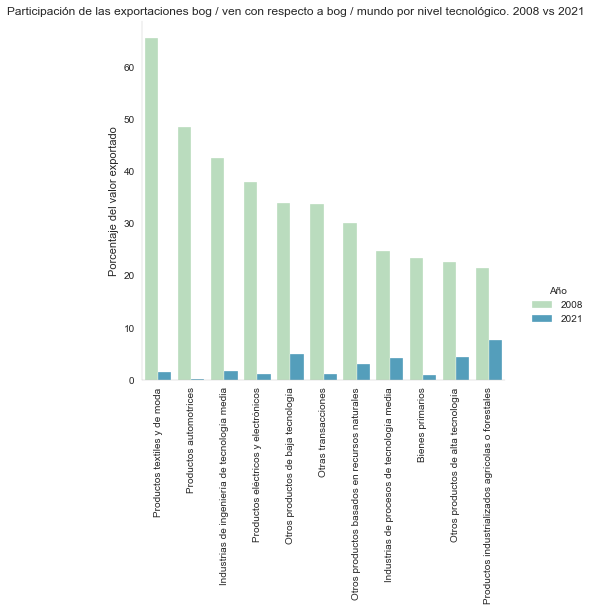

In [138]:
## participación expo bog/ven con respecto a bog / mundo por año y nivel tecnológico desagregado
años = ["2008", "2021"]
h2 = sns.catplot(x = "nivel_tecno_2", y='DOLARES_FOB_CONSTANTES', data=vm3a, kind="bar",
                ci=None, hue= "ANIO",
               height=5.5, aspect=1.1)
h2.fig.suptitle("Participación de las exportaciones bog / ven con respecto a bog / mundo por nivel tecnológico. 2008 vs 2021",x=0.44, y = 1.01,
              horizontalalignment="center")
h2.set(xlabel=None, 
       ylabel="Porcentaje del valor exportado")
#plt.ylim(0, 65)
plt.xticks(rotation=90)
#h2.axes[0,0].set_xticklabels(h2.axes[0,0].get_xticklabels(), rotation=90, ha='right') para hacer rotar las etiquetas del eje x de los subplots
h2._legend.texts[0].set_text("2008")
h2._legend.texts[1].set_text("2021")
h2._legend.set_title("Año")
#plt.savefig("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/h2.png", bbox_inches="tight")
plt.show()

In [139]:
## participación expo bog/ven con respecto a bog / mundo por año y nivel de complejidad
b_v2 = bog_ven.groupby(["ANIO","pci_p3"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) # bogotá a vene.
b_m2 = bog_mundo_1.groupby(["ANIO", "pci_p3"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) #bogotá al mundo con vene.
vm2 = round((b_v2/b_m2)*100,1)
vm2 = vm2.reset_index()

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


IndexError: list index out of range

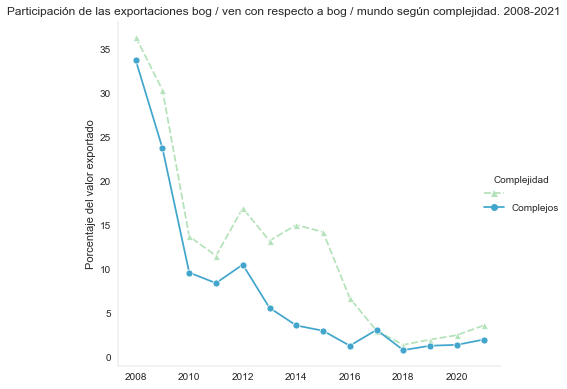

In [345]:
## participación expo bog/ven con respecto a bog / mundo por año y nivel tecnológico agregado
markers = {1.0: "^", 0.0: "o"}
i = sns.relplot(x="ANIO", y='DOLARES_FOB_CONSTANTES', data=vm2, kind="line", 
                ci=None, hue= "pci_p3", style="pci_p3", markers=markers, dashes=True,
               hue_order=[1.0, 0.0], height=5.5, aspect=1.1)
i.fig.suptitle("Participación de las exportaciones bog / ven con respecto a bog / mundo según complejidad. 2008-2021",x=0.44, y = 1.01,
              horizontalalignment="center")
i.set(xlabel=None, 
       ylabel="Porcentaje del valor exportado")
i._legend.texts[0].set_text("")
i._legend.set_title("Complejidad")
i._legend.texts[1].set_text("Complejos")
i._legend.texts[2].set_text("No Complejos")
i._legend.set_bbox_to_anchor((1.2, 0.5)) #(left, bottom, width, height)
#plt.savefig("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/i1.png", bbox_inches="tight")
plt.show()

### E. Top 20 de los productos exportados por bogotá al mundo y a Venezuela 2008 y 2021.

In [140]:
bog_ven.columns

Index(['ANIO', 'DEPARTAMENTO_ORIGEN', 'PAIS_DESTINO', 'CODIGO_PARTIDA',
       'NOMBRE_PARTIDA', 'DOLARES_FOB_CORRIENTES', 'KGS_NETOS', 'ipp_e_norm',
       'deflactor', 'DOLARES_FOB_CONSTANTES', 'partida_x', 'nivel_tecno_1',
       'nivel_tecno_2', 'partida_y', 'des_partida', 'pci_p3'],
      dtype='object')

In [141]:
# productos exportados de bogotá a venezuela
pro_bv = bog_ven.groupby(["ANIO", "CODIGO_PARTIDA", "NOMBRE_PARTIDA",
                          "nivel_tecno_1", "pci_p3"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) # bogotá a vene.
pro_bv = pro_bv.reset_index()
pro_bv = pro_bv.sort_values(by=['ANIO', 'DOLARES_FOB_CONSTANTES'], ascending=[True, False])
pro_bv = pro_bv.reset_index(drop =True)
pro_bv["Origen-Destino"] = "Bogotá-Venezuela"
#20 primeros productos por año
pro_bv_20 = pro_bv.groupby("ANIO").head(20)
pro_bv_20 = pro_bv_20.reset_index(drop=True)
pro_bv_20["Origen-Destino"] = "Bogotá-Venezuela"

In [142]:
comple.columns

Index(['partida', 'des_partida', 'pci_p3'], dtype='object')

In [143]:
# en la base de complejidad la partida 6004 no tiene clasificación, por ello sale del top 20 cuando se agrega la variable de complejidad
comple[comple["partida"]=="6004"] #comple

,partida,des_partida,pci_p3
489,6004,"Tejidos de punto de anchura superior a 30 cm, ...",NaN


In [144]:
pd.options.display.max_colwidth = 400
pd.options.display.float_format = '{:.0f}'.format #pd.options.display.max_columns, max_info_columns,precision, .float_format = '{:.2f}%'.format
pro_bv_20.head(5)

,ANIO,CODIGO_PARTIDA,NOMBRE_PARTIDA,nivel_tecno_1,pci_p3,DOLARES_FOB_CONSTANTES,Origen-Destino
0,2008,8703,"Automóviles de turismo y demás vehículos automóviles concebidos principalmente para el transporte de personas (excepto los de la partida 87.02), incluidos los del tipo familiar («break» o «station wagon») y los de carreras.",Manufacturas de tecnología media,1,108922149,Bogotá-Venezuela
1,2008,3004,"Medicamentos (excepto los productos de las partidas 30.02, 30.05 ó 30.06) constituidos por productos mezclados o sin mezclar, preparados para usos terapéuticos o profilácticos, dosificados (incluidos los administrados por vía trans-dérmica) o acondicionados para la venta al por menor.",Manufacturas de alta tecnología,1,83702770,Bogotá-Venezuela
2,2008,8504,"Transformadores eléctricos, convertidores eléctricos estáticos (por ejemplo: rectificadores) y bobinas de reactancia (autoinducción).",Manufacturas de alta tecnología,1,65943126,Bogotá-Venezuela
3,2008,3302,"Mezclas de sustancias odoríferas y mezclas (incluidas las disoluciones alcohólicas) a base de una o varias de estas sustancias, de los tipos utilizados como materias básicas para la industria; las demás preparaciones a base de sustancias odoríferas, de los tipos utilizados para la elaboración de bebidas.",Manufacturas basadas en recursos naturales,1,50583697,Bogotá-Venezuela
4,2008,6109,"«T-shirts» y camisetas interiores, de punto.",Manufacturas de baja tecnología,0,48702677,Bogotá-Venezuela


In [145]:
# productos exportados de bogotá al mundo
pro_bm = bog_mundo_1.groupby(["ANIO", "CODIGO_PARTIDA", "NOMBRE_PARTIDA",
                             "nivel_tecno_1", "pci_p3"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) # bogotá a vene.
pro_bm = pro_bm.reset_index()
pro_bm = pro_bm.sort_values(by=['ANIO', 'DOLARES_FOB_CONSTANTES'], ascending=[True, False])
pro_bm = pro_bm.reset_index(drop =True)
pro_bm["Origen-Destino"] = "Bogotá-Mundo"
# 20 primeros productos por año
pro_bm_20 = pro_bm.groupby("ANIO").head(20)
pro_bm_20 = pro_bm_20.reset_index(drop=True)
pro_bm_20["Origen-Destino"] = "Bogotá-Mundo"
pro_bm_20.head(5)

,ANIO,CODIGO_PARTIDA,NOMBRE_PARTIDA,nivel_tecno_1,pci_p3,DOLARES_FOB_CONSTANTES,Origen-Destino
0,2008,7306,"Los demás tubos y perfiles huecos (por ejemplo: soldados, remachados, grapados o con los bordes simplemente aproximados), de hierro o acero.",Manufacturas de baja tecnología,0,206321176,Bogotá-Mundo
1,2008,3004,"Medicamentos (excepto los productos de las partidas 30.02, 30.05 ó 30.06) constituidos por productos mezclados o sin mezclar, preparados para usos terapéuticos o profilácticos, dosificados (incluidos los administrados por vía trans-dérmica) o acondicionados para la venta al por menor.",Manufacturas de alta tecnología,1,201960402,Bogotá-Mundo
2,2008,2710,"Aceites de petróleo o de mineral bituminoso, excepto los aceites crudos; preparaciones no expresadas ni comprendidas en otra parte, con un contenido de aceites de petróleo o de mineral bituminoso superior o igual al 70 % en peso, en las que estos aceites constituyan el elemento base; desechos de aceites.",Manufacturas basadas en recursos naturales,0,177953041,Bogotá-Mundo
3,2008,1511,"Aceite de palma y sus fracciones, incluso refinado, pero sin modificar químicamente.",Manufacturas basadas en recursos naturales,0,172679802,Bogotá-Mundo
4,2008,8703,"Automóviles de turismo y demás vehículos automóviles concebidos principalmente para el transporte de personas (excepto los de la partida 87.02), incluidos los del tipo familiar («break» o «station wagon») y los de carreras.",Manufacturas de tecnología media,1,171097012,Bogotá-Mundo


In [146]:
#concatenar todos los productos
pro_tot = pd.concat([pro_bm, pro_bv])
#concatenar 20 primeros productos
pro_20 = pd.concat([pro_bm_20, pro_bv_20])
# exportar
salida = pg + "/pro_20_bm_bv.xlsx"
writer = pd.ExcelWriter(salida)
# pestaña de productos totales
pro_tot.to_excel(writer, sheet_name = "todos_productos", header = True, index=False)
# pestaña de 20 primeros productos por año
pro_20.to_excel(writer, sheet_name = "primeros_20", header = True, index=False)
#writer.save()
writer.close()

### Productos únicos exportados desde Bogotá

In [147]:
# valor de los 608 productos exportados desde bogotá a venezuela en 2008 por año, valor total y proporción hacía USA, méxico y perú

608 productos exportados desde bogotá a venezuela en 2008. Valor total y proporción hacía otros USA, méxico y perú

In [148]:
pd.options.display.float_format = '{:.1f}'.format 

In [149]:
list_t_08 = list(bog_ven[bog_ven["ANIO"]==2008]["CODIGO_PARTIDA"])  #partidas 2008 de bogotá a venezuela
expo_t_08 = exp_nt_com[exp_nt_com["CODIGO_PARTIDA"].isin(list_t_08)] #extraigo solo las partidas de 2008 de la base completa
bog_t_08 = expo_t_08[expo_t_08["DEPARTAMENTO_ORIGEN"]=="Bogotá"] # filtro para bogotá
bog_t_08_p = bog_t_08[bog_t_08["PAIS_DESTINO"].isin(["Venezuela", "Estados Unidos", "Ecuador", "Perú", "México"])] 
bog_t_08_p = bog_t_08_p.reset_index(drop = True)
bt_08p = bog_t_08_p.groupby(["ANIO", "PAIS_DESTINO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) # agrupación por año solo de las partidas seleccionadas base 2008 
bt_08pr = bt_08p.reset_index()

In [150]:
## valor de canasta de 2008 por año a todos los destinos
bog_t_08T = bog_t_08.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})
bog_t_08T = bog_t_08T.reset_index()
bog_t_08T

,ANIO,DOLARES_FOB_CONSTANTES
0,2008.0,4559021272.1
1,2009.0,3427046232.8
2,2010.0,3498951814.6
3,2011.0,4372257027.2
4,2012.0,3677882379.9
5,2013.0,3581034303.1
6,2014.0,3403187310.7
7,2015.0,2934752589.0
8,2016.0,2586638107.3
9,2017.0,1745867102.4


In [151]:
##Valor total de la canasta de 2008 exportada a los principales destinos
bt_08pr.tail(50) 

,ANIO,PAIS_DESTINO,DOLARES_FOB_CONSTANTES
20,2012.0,Ecuador,522910576.5
21,2012.0,Estados Unidos,908890345.4
22,2012.0,México,170682205.1
23,2012.0,Perú,212408297.8
24,2012.0,Venezuela,520678933.3
25,2013.0,Ecuador,555519947.4
26,2013.0,Estados Unidos,998191076.2
27,2013.0,México,177275892.5
28,2013.0,Perú,212866018.6
29,2013.0,Venezuela,338446762.1


In [152]:
#porcentaje de toda la canasta exportada a venezuela frente a todos los destinos
print("ven/mundo 2008:", round((1766601253.7/4559021272.1)*100,1))
print("ven/mundo 2021:", round((70518313/3069130738)*100,1))
print("mundo2021/mundo2008:", round((3069130738.2/4559021272.1)*100,1))
print(67.3-2.3)
print("usa2008/mundo2008:", round((748455362.0/4559021272.1)*100,1))
print("usa2021/mundo2021:", round((1209212849.8/3069130738.2)*100,1))

ven/mundo 2008: 38.7
ven/mundo 2021: 2.3
mundo2021/mundo2008: 67.3
65.0
usa2008/mundo2008: 16.4
usa2021/mundo2021: 39.4


In [153]:
#productos únicos exportados a venezuela en 2008 que tambiénse exportaron a estados unidos
len(bog_t_08_p[(bog_t_08_p["ANIO"]==2008) & (bog_t_08_p["PAIS_DESTINO"]=="Estados Unidos")]["CODIGO_PARTIDA"].unique())

395

In [154]:
## en 2008 se exportaban a estados unidos 395 productos únicos de los 608 exportados a venezuela en 2008 
## equivalentes a 748.455.361
bog_t_08_p[(bog_t_08_p["ANIO"]==2008) 
           & (bog_t_08_p["PAIS_DESTINO"]=="Estados Unidos")]["DOLARES_FOB_CONSTANTES"].sum()

748455361.98

La canasta de 20 principales productos exportados a Venezuela equivalía a US$ 937.188.550 en 2008 52,4 % del total exportado a todos los destinos
En 2021, esta canasta se redujo a 2,8% versus la reducción en las exportaciones totales a 29,3 % (26.5 p.p de diferencia) 

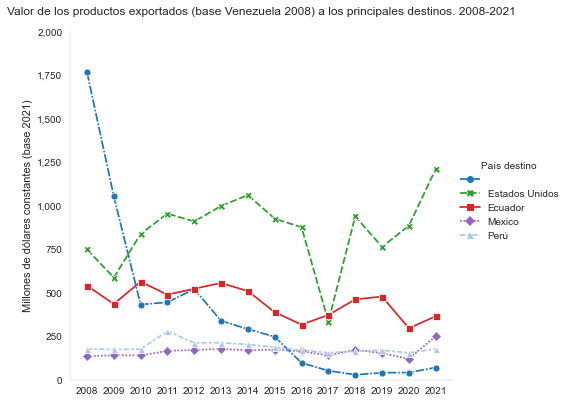

In [155]:
## gráfica 
marker_styles = {"Venezuela": "o", "Perú": "^", "Ecuador": "s", 
                 "México": "D", "Estados Unidos": "X"}
colors = {"Venezuela": '#1f77b4', "Perú": '#aec7e8', "Ecuador": '#d62728', 
                 "México":'#9467bd', "Estados Unidos": '#2ca02c'}
order= ["Venezuela","Estados Unidos", "Ecuador", "México", "Perú"]
import matplotlib.colors as mcolors
palette = sns.color_palette("tab20", n_colors=20)
specific_colors = [mcolors.to_hex(palette[i]) for i in [0,1,4,6,8]]
sns.set_palette(palette=specific_colors, color_codes=True)
j = sns.relplot(x="ANIO", y="DOLARES_FOB_CONSTANTES", data=bt_08pr, kind="line", palette=colors,
                ci=None, hue= "PAIS_DESTINO", style="PAIS_DESTINO", markers=marker_styles, dashes=True,
               height=5.5, aspect=1.1, hue_order=order)
j.fig.suptitle("Valor de los productos exportados (base Venezuela 2008) a los principales destinos. 2008-2021",x=0.44, y = 1.01,
              horizontalalignment="center")
j.set(xlabel=None, 
       ylabel="Millones de dólares constantes (base 2021)")
# colcoar en el eje x todos los años
years = bt_08pr['ANIO'].unique()
plt.xticks(years)
# Define y-axis formatter function
def y_format(x, _):
    return '{:,.0f}'.format(x/1000000)
j.ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_format))
j.ax.set_ylim(bottom=0, top=2000000000)
# Apply formatter to y-axis labels for each subplot in the grid
j._legend.texts[0].set_text("")
j._legend.set_title("País destino")
plt.savefig(pg + str("/j1v2.pdf"), bbox_inches="tight") #png
plt.show()

In [275]:
#Participación de los productos exportados (base Venezuela 2008) a los principales destinos. 2008-2021
bog_mun_p = bog_mundo_1[bog_mundo_1["PAIS_DESTINO"].isin(["Venezuela", "Estados Unidos", "Ecuador", "Perú", "México"])] 
bog_mun_p = bog_mun_p.reset_index(drop = True)
bog_mun_pg = bog_mun_p.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})
kv2 = round((bt_08p/bog_mun_pg)*100,1)
kv2 = kv2.reset_index()

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


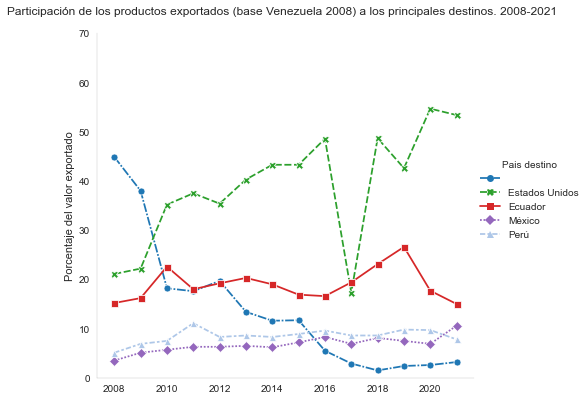

In [276]:
## gráfica 
marker_styles = {"Venezuela": "o", "Perú": "^", "Ecuador": "s", 
                 "México": "D", "Estados Unidos": "X"}
colors = {"Venezuela": '#1f77b4', "Perú": '#aec7e8', "Ecuador": '#d62728', 
                 "México":'#9467bd', "Estados Unidos": '#2ca02c'}
order= ["Venezuela","Estados Unidos", "Ecuador", "México", "Perú"]
import matplotlib.colors as mcolors
palette = sns.color_palette("tab20", n_colors=20)
specific_colors = [mcolors.to_hex(palette[i]) for i in [0,1,4,6,8]]
sns.set_palette(palette=specific_colors, color_codes=True)
l = sns.relplot(x="ANIO", y="DOLARES_FOB_CONSTANTES", data=kv2, kind="line", palette=colors,
                ci=None, hue= "PAIS_DESTINO", style="PAIS_DESTINO", markers=marker_styles, dashes=True,
               height=5.5, aspect=1.1, hue_order=order)
l.fig.suptitle("Participación de los productos exportados (base Venezuela 2008) a los principales destinos. 2008-2021",x=0.44, y = 1.04,
              horizontalalignment="center")
l.set(xlabel=None, 
       ylabel="Porcentaje del valor exportado")
# limit y-axis
l.ax.set_ylim(bottom=0, top=70)
# Apply formatter to y-axis labels for each subplot in the grid
l._legend.texts[0].set_text("")
l._legend.set_title("Pais destino")
#plt.savefig("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/l1v2.png", bbox_inches="tight")
plt.show()

In [277]:
#20 productos a los principales destinos
list_20_08 = list(pro_bv_20[pro_bv_20["ANIO"]==2008]["CODIGO_PARTIDA"]) 
expo_20_08 = exp_nt_com[exp_nt_com["CODIGO_PARTIDA"].isin(list_20_08)]
bog_20_08 = expo_20_08[expo_20_08["DEPARTAMENTO_ORIGEN"]=="Bogotá"]
bog_20_08_p = bog_20_08[bog_20_08["PAIS_DESTINO"].isin(["Venezuela", "Estados Unidos", "Ecuador", "Perú", "México"])] 
bog_20_08_p = bog_20_08_p.reset_index(drop = True)
b20_08p = bog_20_08_p.groupby(["ANIO", "PAIS_DESTINO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})
b20_08pr = b20_08p.reset_index()

In [278]:
## valor 20 pricipales productos por año a todos los destinos
bog_20_08T = bog_20_08.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})
bog_20_08T = bog_20_08T.reset_index()
bog_20_08T

,ANIO,DOLARES_FOB_CONSTANTES
0,2008.0,1658239338.1
1,2009.0,1053086267.2
2,2010.0,812367887.5
3,2011.0,763562467.0
4,2012.0,798540333.3
5,2013.0,759810070.8
6,2014.0,693981815.5
7,2015.0,648833013.0
8,2016.0,509044753.3
9,2017.0,495160401.2


In [279]:
## valor 20 pricipales productos por año a los principales destinos
b20_08pr

,ANIO,PAIS_DESTINO,DOLARES_FOB_CONSTANTES
0,2008.0,Ecuador,262843774.5
1,2008.0,Estados Unidos,263241437.7
2,2008.0,México,41910803.8
3,2008.0,Perú,60148688.0
4,2008.0,Venezuela,819046509.5
...,...,...,...
65,2021.0,Ecuador,120495745.5
66,2021.0,Estados Unidos,72887367.5
67,2021.0,México,31664696.6
68,2021.0,Perú,62929514.8


In [274]:
#porcentaje de los 20 productos principales exportados a venezuela frente a todos los destinos
print("ven/mundo 2008:", round((937188550/1788819526)*100,1))
print("ven/mundo 2021:", round((14811749/524939547)*100,1))
print("mundo2021/mundo2008:", round((524939547/1788819526)*100,1))
29.3 -2.8

ven/mundo 2008: 52.4
ven/mundo 2021: 2.8
mundo2021/mundo2008: 29.3


26.5

In [ ]:
## gráfica 20 principales productos
marker_styles = {"Venezuela": "o", "Perú": "^", "Ecuador": "s", 
                 "México": "D", "Estados Unidos": "X"}
colors = {"Venezuela": '#1f77b4', "Perú": '#aec7e8', "Ecuador": '#d62728', 
                 "México":'#9467bd', "Estados Unidos": '#2ca02c'}
order= ["Venezuela","Estados Unidos", "Ecuador", "México", "Perú"]
import matplotlib.colors as mcolors
palette = sns.color_palette("tab20", n_colors=20)
specific_colors = [mcolors.to_hex(palette[i]) for i in [0,1,4,6,8]]
sns.set_palette(palette=specific_colors, color_codes=True)
j = sns.relplot(x="ANIO", y="DOLARES_FOB_CONSTANTES", data=b20_08pr, kind="line", palette=colors,
                ci=None, hue= "PAIS_DESTINO", style="PAIS_DESTINO", markers=marker_styles, dashes=True,
               height=5.5, aspect=1.1, hue_order=order)
j.fig.suptitle("Valor de los 20 productos principales (2008) a los principales destinos. 2008-2021",x=0.44, y = 1.01,
              horizontalalignment="center")
j.set(xlabel=None, 
       ylabel="Dolares constantes (base 2021)")
# Define y-axis formatter function
def y_format(x, _):
    return '{:,.0f} M'.format(x/1000000)
j.ax.yaxis.set_major_formatter(ticker.FuncFormatter(y_format))
j.ax.set_ylim(bottom=0, top=1000000000)
# Apply formatter to y-axis labels for each subplot in the grid
j._legend.texts[0].set_text("")
j._legend.set_title("Pais destino")
#plt.savefig("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/j1.png", bbox_inches="tight")
plt.show()

In [ ]:
#base para 5 países y partidas arancelarias seleccionadas
bog_mun_p = bog_mundo_1[bog_mundo_1["PAIS_DESTINO"].isin(["Venezuela", "Estados Unidos", "Ecuador", "Perú", "México"])] 
bog_mun_p = bog_mun_p.reset_index(drop = True)
bog_mun_pg = bog_mun_p.groupby(["ANIO", "PAIS_DESTINO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})
k = round((b20_08p/bog_mun_pg)*100,1)
k = k.reset_index()

In [ ]:
pd.options.display.float_format = '{:.1f}'.format

In [ ]:
## gráfica 
marker_styles = {"Venezuela": "o", "Perú": "^", "Ecuador": "s", 
                 "México": "D", "Estados Unidos": "X"}
colors = {"Venezuela": '#1f77b4', "Perú": '#aec7e8', "Ecuador": '#d62728', 
                 "México":'#9467bd', "Estados Unidos": '#2ca02c'}
order= ["Venezuela","Estados Unidos", "Ecuador", "México", "Perú"]
import matplotlib.colors as mcolors
palette = sns.color_palette("tab20", n_colors=20)
specific_colors = [mcolors.to_hex(palette[i]) for i in [0,1,4,6,8]]
sns.set_palette(palette=specific_colors, color_codes=True)
l = sns.relplot(x="ANIO", y="DOLARES_FOB_CONSTANTES", data=k, kind="line", palette=colors,
                ci=None, hue= "PAIS_DESTINO", style="PAIS_DESTINO", markers=marker_styles, dashes=True,
               height=5.5, aspect=1.1, hue_order=order)
l.fig.suptitle("Participación de los 20 productos principales (2008) a los principales destinos. 2008-2021",x=0.44, y = 1.04,
              horizontalalignment="center")
l.set(xlabel=None, 
       ylabel="Porcentaje del valor exportado")
# limit y-axis
l.ax.set_ylim(bottom=0, top=60)
# Apply formatter to y-axis labels for each subplot in the grid
l._legend.texts[0].set_text("")
l._legend.set_title("Pais destino")
#plt.savefig("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/l1.png", bbox_inches="tight")
plt.show()

In [ ]:
#proporción de partidas arancelarias a venezuela con respecto al total exportado a venezuela
bog_20_08v = bog_20_08[bog_20_08["PAIS_DESTINO"]=="Venezuela"]
bog_20_08vg = bog_20_08v.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})
bog_veng = bog_ven.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})
o = round((bog_20_08vg /bog_veng)*100,1)
o = o.reset_index()
o["ANIO"] = o["ANIO"].astype("int")

In [ ]:
#Bogotá al resto del mundo
o1=sns.lineplot(x="ANIO", y="DOLARES_FOB_CONSTANTES", data=o, ci=None, 
             label=None, estimator= None)
#etiquetas gráfica a
xa=o1.get_lines()[0].get_data()[0] #get_lines()[] 0 para bogotá al mundo 1 para bogotá a venezuela; get_data()[] 0 eje x, 1 eje y
ya=o1.get_lines()[0].get_data()[1]
for i,j in zip(xa,ya):
    o1.annotate(j, xy=(i,j), textcoords="offset points", 
             xytext=(-5, 8), ha='left', fontsize=8)
# asigna valores del eje y en el formato espcificado
#import matplotlib.ticker as ticker
o1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
o1.set_ylim(0, 70)
o1.set_title("Proporción de los 20 productos principales (base 2008) exportados a Venezuela \n frente al total exportado. 2008-2021")
# Add x-axis and y-axis labels
o1.set_xlabel(None)
o1.set_ylabel("Porcentaje del valor exportado")
#plt.savefig("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/o1.png", bbox_inches="tight")
plt.show()

In [ ]:
## Cinco principales productos que se exportaban en 2008 y se siguen exportando en 2021.
bog_20_08v_5 = bog_20_08v.groupby(["ANIO","CODIGO_PARTIDA", "NOMBRE_PARTIDA"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})
bog_20_08v_5r = bog_20_08v_5.reset_index()
bog_20_08v_5r = bog_20_08v_5r.sort_values(by=['ANIO', 'DOLARES_FOB_CONSTANTES'], ascending=[True, False])
bog_20_08v_5r = bog_20_08v_5r.reset_index(drop =True)
b20v5r= bog_20_08v_5r.groupby("ANIO").head(5)
b20v5r[b20v5r["ANIO"]==2021]

In [ ]:
## Cinco principales productos que se exportaban en 2008 y se siguen exportando en 2021. 2008 vs 2021
bog_20_08v_5r[bog_20_08v_5r["CODIGO_PARTIDA"].isin(["3004", "3302", "3923", "4901", "3305"]) & bog_20_08v_5r["ANIO"].isin([2008,2021])]

### a) Se exportaron en 2008 y 2021, b) Solo se exportaron en 2008, y c) Solo se exportaron en 2021

In [360]:
#Cuales son los 10 productos más relevantes que se exportaban en 2008 a Venezuela pero no en 2021?
# este código hace lo mismo pero más corto: bog_ven[(bog_ven["CODIGO_PARTIDA"].isin(bog_ven[bog_ven["ANIO"]==2008]["CODIGO_PARTIDA"])) & ~(bog_ven["CODIGO_PARTIDA"].isin(bog_ven[bog_ven["ANIO"]==2021]["CODIGO_PARTIDA"]))]
p_21 = bog_ven[bog_ven["ANIO"]==2021] #filtro para el 2021
l_p_uniq_21 =set(p_21["CODIGO_PARTIDA"]) #partidas únicos 2021
p_08 = bog_ven[bog_ven["ANIO"]==2008] # filtro 2008
l_p_uniq_08 =set(p_08["CODIGO_PARTIDA"]) #partidas únicos 2008

In [361]:
#Número de productos únicos en 2021
len(l_p_uniq_21)

363

In [390]:
#Número de productos únicos en 2008
len(p_08)

608

#### a) se exportaron en 2008 y 2021

In [363]:
#Productos exportados a Venezuela en 2008 que se siguen exportando en 2021
p_in_08_21 = p_08[p_08["CODIGO_PARTIDA"].isin(l_p_uniq_21)] #partidas que están en 2008 y 2021
len(set(p_in_08_21["CODIGO_PARTIDA"]))

304

#### b) Solo se exportaron en 2008

In [364]:
# productos exportados en 2008 pero NO en 2021 
p_dif_21 = p_08[~p_08["CODIGO_PARTIDA"].isin(l_p_uniq_21)] #partidas que no están en 2021 pero si en 2008
#agrupar por valor exportado y extraer los 10 primeros
p_dif_21.groupby(["CODIGO_PARTIDA", "NOMBRE_PARTIDA"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}).sort_values(by ="DOLARES_FOB_CONSTANTES", ascending=False).head(10)

,,DOLARES_FOB_CONSTANTES
CODIGO_PARTIDA,NOMBRE_PARTIDA,
8703,"Automóviles de turismo y demás vehículos automóviles concebidos principalmente para el transporte de personas (excepto los de la partida 87.02), incluidos los del tipo familiar («break» o «station wagon») y los de carreras.",108922148.8
8704,Vehículos automóviles para transporte de mercancías.,43530095.4
5509,Hilados de fibras sintéticas discontinuas (excepto el hilo de coser) sin acondicionar para la venta al por menor.,39650655.6
4107,"Cueros preparados después del curtido o del secado y cueros y pieles apergaminados, de bovino (incluido el búfalo) o de equino, depilados, incluso divididos, excepto los de la partida 41.14.",30326423.5
2515,"Mármol, travertinos, «ecaussines» y demás piedras calizas de talla o de construcción de densidad aparente superior o igual a 2,5, y alabastro, incluso desbastados o simplemente troceados, por aserrado o de otro modo, en bloques o en placas cuadradas o rectangulares.",26788860.0
8537,"Cuadros, paneles, consolas, armarios y demás soportes equipados con varios aparatos de las partidas 85.35 u 85.36, para control o distribución de electricidad, incluidos los que incorporen instrumentos o aparatos del Capítulo 90, así como los aparatos de control numérico, excepto los aparatos de conmutación de la partida 85.17.",21326524.9
0701,Patatas (papas)* frescas o refrigeradas,20746470.5
5208,"Tejidos de algodón con un contenido de algodón superior o igual al 85 % en peso, de peso inferior o igual a 200 g/m².",19797401.5
8208,"Cuchillas y hojas cortantes, para máquinas o aparatos mecánicos.",16049489.1


In [365]:
#Número de productos que se exportaron en 2008 pero no en 2021
len(set(p_dif_21["CODIGO_PARTIDA"]))

304

#### C) Solo se exportaron en 2021

In [366]:
# productos exportados en 2021 pero NO en 2008
p_dif_08 = p_21[~p_21["CODIGO_PARTIDA"].isin(l_p_uniq_08)] #partidas que no están en 2008 pero si en 2021 

In [367]:
#Número de productos que se exportaron en 2008 pero no en 2021
len(set(p_dif_08["CODIGO_PARTIDA"]))

59

In [ ]:
# De 2008 a 2021 se dejaron de exportar 608-304 = 304 productos únicos y se siguieron exportando 304.
# 59 son nuevos productos en 2021 (363 únicos 2021 - 304 exportados en 2008 y 2021) 
# validación: bog_ven[(bog_ven["ANIO"]==2021) & (bog_ven["CODIGO_PARTIDA"]=="6406")]

### Participación de productos complejos y no complejos en principales destinos

In [ ]:
def otros(x):
    if x not in ["Venezuela", "Estados Unidos", "Ecuador", "Perú", "México"]:
        return "Otros"
    else:
        return x
exp_nt_com["PRIN_DESTINOS"] = exp_nt_com["PAIS_DESTINO"].apply(otros)

In [ ]:
bog_mundo_1 = exp_nt_com[exp_nt_com["DEPARTAMENTO_ORIGEN"]=="Bogotá"]

In [ ]:
#complejos
bog_mun_c = bog_mundo_1[bog_mundo_1["pci_p3"]==1]
bog_mun_pg = bog_mun_c.groupby(["ANIO", "PRIN_DESTINOS"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) 
bog_mun_cg = bog_mun_c.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})
m = round((bog_mun_pg/bog_mun_cg)*100,1)
mr = m.reset_index()

In [ ]:
mr["ANIO"] = mr["ANIO"].astype("int")

In [ ]:
sns.set_palette("mako_r")
pivo_3 = pd.pivot_table(data=mr, values='DOLARES_FOB_CONSTANTES', index='ANIO', columns='PRIN_DESTINOS')
# create a stacked column chart using seaborn
ax = pivo_3.plot(kind='bar', stacked=True)
# add labels to each bar
for i, patch in enumerate(ax.containers):
    for j, bar in enumerate(patch.patches):
        value = f"{pivo_3.iloc[j,i]:.1f}"
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + bar.get_height() / 2,
            value,
            ha='center',
            va='center',
            fontsize=7,
            color='white'
        )
#add labels to each bar
plt.title("Participación de las exportaciones de productos complejos a los principales destinos. 2008-2021", pad = 10) 
# add labels and legend
plt.xlabel(None)
plt.ylabel("Porcentaje del valor exportado")
plt.legend(title='', bbox_to_anchor=(1.6, 0.7))
#plt.savefig("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/m1.png", bbox_inches="tight")
# show the chart
plt.show()

In [ ]:
# no complejos
bog_mun_nc = bog_mundo_1[bog_mundo_1["pci_p3"]==0]
bog_mun_npg = bog_mun_nc.groupby(["ANIO", "PRIN_DESTINOS"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum}) 
bog_mun_ncg = bog_mun_nc.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})
n = round((bog_mun_npg/bog_mun_ncg)*100,1)
nr = n.reset_index()

In [ ]:
nr["ANIO"] = nr["ANIO"].astype("int")

In [ ]:
sns.set_palette("mako_r")  #ocean_r
pivo_4= pd.pivot_table(data=nr, values='DOLARES_FOB_CONSTANTES', index='ANIO', columns='PRIN_DESTINOS')
# create a stacked column chart using seaborn
ax = pivo_4.plot(kind='bar', stacked=True)
# add labels to each bar
for i, patch in enumerate(ax.containers):
    for j, bar in enumerate(patch.patches):
        value = f"{pivo_4.iloc[j,i]:.1f}"
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_y() + bar.get_height() / 2,
            value,
            ha='center',
            va='center',
            fontsize=7,
            color='white'
        )
#add labels to each bar
plt.title("Participación de las exportaciones de productos no complejos a los principales destinos. 2008-2021", pad = 10) 
# add labels and legend
plt.xlabel(None)
plt.ylabel("Porcentaje del valor exportado")
plt.legend(title='', bbox_to_anchor=(1.6, 0.7))
#plt.savefig("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/n1.png", bbox_inches="tight")
# show the chart
plt.show()

### potencial de crecimiento

In [369]:
## primera forma
((bog_ven[bog_ven["ANIO"]==2008]["DOLARES_FOB_CONSTANTES"].sum() 
 - bog_ven[bog_ven["ANIO"]==2021]["DOLARES_FOB_CONSTANTES"].sum()) / bog_mundo_1[bog_mundo_1["ANIO"]==2021]["DOLARES_FOB_CONSTANTES"].sum())*100

50.34830309528899

In [370]:
#exportaciones de bogotá al resto del mundo sin venezuela
bog_mundo_1_sv = exp_nt_com[(exp_nt_com["DEPARTAMENTO_ORIGEN"]=="Bogotá") & (expo_08_21["PAIS_DESTINO"]!="Venezuela")]
bog_mundo_1_sv = bog_mundo_1_sv.reset_index(drop=True)

In [371]:
## segunda forma. Tabla
pd.options.display.float_format = '{:.1f}'.format 
#lista de diccionarios. cada diccionario es una fila
table = [
    {"Destino": "Venezuela", "2008":bog_ven[bog_ven["ANIO"]==2008]["DOLARES_FOB_CONSTANTES"].sum(),
     "2021":bog_ven[bog_ven["ANIO"]==2021]["DOLARES_FOB_CONSTANTES"].sum()},
    {"Destino": "Resto mundo sin ven", "2008":bog_mundo_1_sv[bog_mundo_1_sv["ANIO"]==2008]["DOLARES_FOB_CONSTANTES"].sum(),
     "2021":bog_mundo_1_sv[bog_mundo_1_sv["ANIO"]==2021]["DOLARES_FOB_CONSTANTES"].sum()} 
]
# convertir  dataframe
table_1 = pd.DataFrame(table)
# crear nueva fila con el total
new_row = {"Destino": "Total", "2008": table_1["2008"].sum(), "2021": table_1["2021"].sum()}
# apendizar a la lista de diccionarios
table.append(new_row)
# convertir nuevamente a dataframe
table_1 = pd.DataFrame(table)
#crear variable variación
table_1["variación"] = ((table_1["2021"] - table_1["2008"]) / table_1["2008"])*100
#crear variable imputación fila 1
table_1.loc[0, "Imputación"] = (0.087+1)*table_1.loc[0, "2008"]
#crear variable imputación fila 2
table_1.loc[1, "Imputación"] = table_1.loc[1, "2021"]
#crear variable imputación fila 3
table_1.loc[2, "Imputación"] = (0.087+1)* (table_1.loc[0, "2008"]) + table_1.loc[1, "2021"]
#imprimir tabla
table_1

,Destino,2008,2021,variación,Imputación
0,Venezuela,1766601253.7,82520200.3,-95.3,1920295562.8
1,Resto mundo sin ven,3002549455.1,3262341393.7,8.7,3262341393.7
2,Total,4769150708.9,3344861594.0,-29.9,5182636956.5


In [377]:
## datos para obtener el promedio anual
bog_mundo_1_sv.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})
#1,8 % promedio anual. calculado en excel

,DOLARES_FOB_CONSTANTES
ANIO,
2008.0,3002549455.1
2009.0,2662407851.3
2010.0,3301571473.8
2011.0,4186641928.3
2012.0,3443030538.2
2013.0,3531678703.9
2014.0,3376833335.0
2015.0,2941991166.8
2016.0,2711047324.6


### índice de priorización 

In [ ]:
#!pip3 install openpyxl==3.0.7 --upgrade
import openpyxl
openpyxl.__version__

In [ ]:
# cargue de la base
ind_pri = pd.read_excel("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/índice_Vocación_Exportadora.xlsx")
#completar la variable partida
ind_pri['partida'] = ind_pri['partida'].astype(str).str.zfill(4)
pd.options.display.float_format = '{:.3f}'.format 

In [ ]:
#todos los productos exportados de bogotá a venezuela por año
p_bv_tot = bog_ven.groupby(["ANIO","CODIGO_PARTIDA",
                            "NOMBRE_PARTIDA"]).aggregate({"DOLARES_FOB_CORRIENTES":np.sum})
p_bv_tot = p_bv_tot.reset_index()
# pegue del índice con base de expo bog-ven por año
p_bv_ipri = ind_pri.merge(p_bv_tot, left_on = "partida", right_on = "CODIGO_PARTIDA", validate= "1:m")
#ordenar por año y por índice de priorización
p_bv_ipri = p_bv_ipri.sort_values(by=['ANIO', 'ind_rank'], ascending=[True, False])
p_bv_ipri = p_bv_ipri.reset_index()
#extraer solo unas variables
p_bv_ipri = p_bv_ipri[['ANIO', "partida", "des_partida", 'ind_rank', 'DOLARES_FOB_CORRIENTES']]
#crear variable origen destino
p_bv_ipri["Origen-Destino"] = "Bogotá-Venezuela"

In [ ]:
#todos los productos exportados de bogotá al mundo por año
p_bm_tot = bog_mundo_1.groupby(["ANIO","CODIGO_PARTIDA",
                            "NOMBRE_PARTIDA"]).aggregate({"DOLARES_FOB_CORRIENTES":np.sum})
p_bm_tot = p_bm_tot.reset_index()
# pegue del índice con base de expo bog-mundo por año
p_bm_ipri = ind_pri.merge(p_bm_tot, left_on = "partida", right_on = "CODIGO_PARTIDA", validate= "1:m")
#ordenar por año y por índice de priorización
p_bm_ipri = p_bm_ipri.sort_values(by=['ANIO', 'ind_rank'], ascending=[True, False])
p_bm_ipri = p_bm_ipri.reset_index()
#extraer solo unas variables
p_bm_ipri = p_bm_ipri[['ANIO', "partida", "des_partida", 'ind_rank', 'DOLARES_FOB_CORRIENTES']]
#crear variable origen destino
p_bm_ipri["Origen-Destino"] = "Bogotá-mundo"

In [ ]:
#concatenar todos los productos ordenados por año e índice de priorización
pro_tot_ipri = pd.concat([p_bm_ipri, p_bv_ipri])

In [ ]:
# productos exportados de bogotá a venezuela en 2008 agrupados por valor en dolares constantes
p_08g = p_08.groupby(["CODIGO_PARTIDA","NOMBRE_PARTIDA"]).aggregate({"DOLARES_FOB_CORRIENTES":np.sum})
p_08g = p_08g.reset_index()
## productos de 2008 que cruzan con el indice de priorización
p_08_ipri = ind_pri.merge(p_08g, left_on = "partida", right_on = "CODIGO_PARTIDA", validate= "1:m")
# selección de los 20 primeros productos según el índice en 2008
p_08_ipri_vredu = p_08_ipri[["partida", "des_partida", 'ind_rank', 'DOLARES_FOB_CORRIENTES']].sort_values(by = 'ind_rank', ascending = False).head(20)

In [ ]:
# productos exportados de bogotá a venezuela en 2021 agrupados por valor en dolares constantes
p_21g = p_21.groupby(["CODIGO_PARTIDA","NOMBRE_PARTIDA"]).aggregate({"DOLARES_FOB_CORRIENTES":np.sum})
p_21g = p_21g.reset_index()
## productos de 2021 que cruzan con el indice de priorización
p_21_ipri = ind_pri.merge(p_21g, left_on = "partida", right_on = "CODIGO_PARTIDA", validate= "1:m")
# selección de los 20 primeros productos según el índice en 2021
p_21_ipri_vredu = p_21_ipri[["partida", "des_partida", 'ind_rank', 'DOLARES_FOB_CORRIENTES']].sort_values(by = 'ind_rank', ascending = False).head(20)

In [ ]:
# exportar
salida2 = pg + "/pro_bm_bv_ipri.xlsx"
writer2 = pd.ExcelWriter(salida2)
# pestaña de productos totales
pro_tot_ipri.to_excel(writer2, sheet_name = "todos_productos", header = True, index=False)
# pestaña de 20 primeros productos para 2008
p_08_ipri_vredu.to_excel(writer2, sheet_name = "bog-ven20_ipri_08", header = True, index=False)
# pestaña de 20 primeros productos para 2021
p_21_ipri_vredu.to_excel(writer2, sheet_name = "bog-ven20_ipri_21", header = True, index=False)
writer2.close()

### Modulo consulta

In [ ]:
###muebles bogotá venezuela
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.3f}'.format 
cons = bog_ven[bog_ven["CODIGO_PARTIDA"].isin(['9406', '9405', '9404','9403', '9402', '9401'])]
cons_g = cons.groupby(["ANIO", "CODIGO_PARTIDA"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})
bog_ven_g = bog_ven.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})
cons_r = round((cons_g/bog_ven_g)*100,3)
#cons_r.head(100)

In [ ]:
##muebles bogotá mundo
cons_m = bog_mundo[bog_mundo["CODIGO_PARTIDA"].isin(['9406', '9405', '9404','9403', '9402', '9401'])]
cons_m = cons_m.groupby(["ANIO", "CODIGO_PARTIDA"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})
bog_mund_m = bog_mundo.groupby(["ANIO"]).aggregate({"DOLARES_FOB_CONSTANTES":np.sum})
cons_l = round((cons_m/bog_mund_m)*100,3)

## Almacenamiento de código

In [ ]:
# #gráfica con eje secundario
# sns.lineplot(x="ANIO", y="DOLARES_FOB_CONSTANTES", data =hacia_ven, 
#              ci = None, label ="Colombia", estimator='sum')
# #se guarda como objeto para espcificar los valores del eje y, el titulo del gráfico y del eje. Esto se puede hacer en cualquiera de los gráficos sobrepuestos. Con uno es sufiente. 
# b=sns.lineplot(x="ANIO", y="DOLARES_FOB_CONSTANTES",  
#                data =hacia_ven_bog, ci = None, label ="Bogotá", estimator='sum')
# # Crear un eje secundario para la tercera variable
# ax = plt.gca()
# ax2 = ax.twinx()
# # crear la tercera variable y asignarla en objeto para cambiar tipo de linea
# d = sns.lineplot(x="ANIO", y="DOLARES_FOB_CONSTANTES",  data =c, ci = None, 
#              label ="Bog. / Col", estimator=None,color='red', ax=ax2)  
# ##cambiar tupo de linea en eje secundario
# for line in d.lines:
#     line.set_linestyle("dotted")
# #hacer que la leyenda tenga el mismo estilo que la linea
# legend = d.get_legend()
# legend_line = legend.legendHandles[0]
# legend_line.set_linestyle("dotted") #"solid", "dotted", "dashed", y "dashdot
# # Establecer la escala en el eje secundario
# ax2.set_ylim(0, 60)
# #mostrar leyenda en la posición deseada:
# ax.legend(loc='upper left', bbox_to_anchor=(0.75, 0.95), ncol=1)  #leyenda eje principal
# ax2.legend(loc='upper left', bbox_to_anchor=(0.75, 0.85), ncol=1) #leyenda eje secundario

# #par_2.set_yticklabels(np.arange(0,max(c["DOLARES_FOB_CONSTANTES"]),4)) #establece las etiqauetas desde cero hasta el maximo de 10 en 10.
# #par_2.set_yticks(np.arange(0, max(c["DOLARES_FOB_CONSTANTES"]), 4)) #Establece las posiciones númericas dónde se mostraran las etiquetas del eje

# #establecer titulo del eje y
# ax2.set_ylabel("Porcentaje de expo. bogotanas hacia venezuela")
# # asigna valores del eje y en el formato espcificado
# #import matplotlib.ticker as ticker
# b.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f} M'.format(x/1000000)))#b.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
# #_ en el código es una convención en Python para una variable ficticia. Se usa cuando solo te importa el primer argumento en una función y no necesitas usar el segundo argumento.
# b.set_title("Exportaciones hacía Venezuela. 2008-2021") #b.fig.suptitle
# # Add x-axis and y-axis labels
# b.set_xlabel(None)
# b.set_ylabel("Dolares constantes (base 2021)") #b.set(xlabel= None, ylabel="Dolares constantes y corrientes")
# #plt.legend()
# #plt.savefig("G:/Mi unidad/SDDE/secretaria_desarrollo_economico_2022/2023/vocación_exportadora/a2.png", bbox_inches="tight")
# plt.show()